In [ ]:
%matplotlib inline

In [8]:
basedir='/home/rms101/SCRIPTS/cfc/'
import sys
sys.path.append('/home/rms101/PMODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
################settings
#mpl.style.reload_library()
#plt.style.use('rms_paper')


1a. Calculate GM annual mean TAS timeseries LE
#####################################################

In [9]:
rundir=basedir;os.chdir(rundir)
srcdir_base1='//space/hall4/sitestore/eccc/crd/ccrn/users/cmr203/ncconv/netcdfconv/'
srcdir_base2='//space/hall3/sitestore/eccc/crd/ccrn/users/ccc103/'    
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/cfc_post'

do_calc=False
varnm='tas'
if do_calc:
    os.system('mkdir -p {}/DATA_{}_canesm5'.format(datadir,varnm))
    os.chdir('{}/DATA_{}_canesm5'.format(datadir,varnm))
    os.system('/bin/rm *.nc')
    # historical 
    os.system('ln -s ' + srcdir_base1 +'/final/CMIP6/CMIP/*/CanESM5/historical/r*i1p*f1/Amon/tas/*/*/*.nc .')
    # nocfc 
    os.system('ln -s ' + srcdir_base2 +'/rms0056-0*/*/*/CMIP6/CMIP//*/*/hist-noCFC/r*i1p*f1/Amon/tas/*/*/*.nc .')
    # hist-GHG 
    os.system('ln -s ' + srcdir_base1 +'/final/CMIP6/DAMIP/*/CanESM5/hist-GHG/r*i1p*f1/Amon/tas/*/*/*.nc .')
    # hist-aer 
    os.system('ln -s ' + srcdir_base1 +'/final/CMIP6/DAMIP/*/CanESM5/hist-aer/r*i1p*f1/Amon/tas/*/*/*.nc .')
    
    # concat
    ens_his = rut.cd_mkensemble('*historical*',mip='cmip6')
    ens_his = cd.cat_exp_slices(ens_his)
    ens_hisnocfc = rut.cd_mkensemble('*hist-noCFC*',mip='cmip6')    
    ens_hisnocfc = cd.cat_exp_slices(ens_hisnocfc)
    ens_hisghg  = rut.cd_mkensemble('*hist-GHG*',mip='cmip6')    
    ens_hisghg  = cd.cat_exp_slices(ens_hisghg)
    ens_hisaer  = rut.cd_mkensemble('*hist-aer*',mip='cmip6')    
    ens_hisaer  = cd.cat_exp_slices(ens_hisaer)

    print 'Calculate global annual mean'
    # annual means            
    my_cdo_str='cdo -yearmean -seldate,1955-01-01,2005-12-31 {infile} {outfile}' 
    ens_his     =cd.my_operator(ens_his,      my_cdo_str, output_prefix='am_',delete=True)
    ens_hisnocfc=cd.my_operator(ens_hisnocfc, my_cdo_str, output_prefix='am_',delete=True)
    ens_hisghg  =cd.my_operator(ens_hisghg,   my_cdo_str, output_prefix='am_',delete=True)
    ens_hisaer  =cd.my_operator(ens_hisaer,   my_cdo_str, output_prefix='am_',delete=True)
    # global mean            
    my_cdo_str='cdo -fldmean  {infile} {outfile}' 
    ens_his_gm=cd.my_operator(ens_his, my_cdo_str, output_prefix='gm',delete=False)
    ens_hisnocfc_gm=cd.my_operator(ens_hisnocfc, my_cdo_str, output_prefix='gm',delete=False)
    ens_hisghg_gm=cd.my_operator(ens_hisghg, my_cdo_str, output_prefix='gm',delete=False)
    ens_hisaer_gm=cd.my_operator(ens_hisaer, my_cdo_str, output_prefix='gm',delete=False)
    # arctic mean            
    my_cdo_str='cdo -fldmean  -sellonlatbox,0,360,60,90 {infile} {outfile}' 
    ens_his_arc=cd.my_operator(ens_his, my_cdo_str, output_prefix='arc',delete=False)
    ens_hisnocfc_arc=cd.my_operator(ens_hisnocfc, my_cdo_str, output_prefix='arc',delete=False)    
    ens_hisghg_arc=cd.my_operator(ens_hisghg, my_cdo_str, output_prefix='arc',delete=False)
    ens_hisaer_arc=cd.my_operator(ens_hisaer, my_cdo_str, output_prefix='arc',delete=False)
else:
    os.chdir('{}/DATA_{}_canesm5'.format(datadir,varnm))  
    ens_his_gm=rut.cd_mkensemble('gmam*_historical_*',prefix='gmam_',mip='cmip6')
    ens_hisnocfc_gm=rut.cd_mkensemble('gmam*_hist-noCFC_*',prefix='gmam_',mip='cmip6')
    ens_hisghg_gm=rut.cd_mkensemble('gmam*_hist-GHG_*',prefix='gmam_',mip='cmip6')
    ens_hisaer_gm=rut.cd_mkensemble('gmam*_hist-aer_*',prefix='gmam_',mip='cmip6')
    
    ens_his_arc=rut.cd_mkensemble('arcam*_historical_*',prefix='arcam_',mip='cmip6')
    ens_hisnocfc_arc=rut.cd_mkensemble('arcam*_hist-noCFC_*',prefix='arcam_',mip='cmip6')
    ens_hisghg_arc=rut.cd_mkensemble('arcam*_hist-GHG_*',prefix='arcam_',mip='cmip6')    
    ens_hisaer_arc=rut.cd_mkensemble('arcam*_hist-aer_*',prefix='arcam_',mip='cmip6')    

tas_his_gm      =cd.loadfiles(ens_his_gm,'tas')['data']
tas_hisnocfc_gm =cd.loadfiles(ens_hisnocfc_gm,'tas')['data']
tas_hisghg_gm   =cd.loadfiles(ens_hisghg_gm,'tas')['data']
tas_hisaer_gm   =cd.loadfiles(ens_hisaer_gm,'tas')['data']

tas_his_arc     =cd.loadfiles(ens_his_arc,'tas')['data']
tas_hisnocfc_arc=cd.loadfiles(ens_hisnocfc_arc,'tas')['data']
tas_hisghg_arc  =cd.loadfiles(ens_hisghg_arc,'tas')['data']
tas_hisaer_arc  =cd.loadfiles(ens_hisaer_arc,'tas')['data']

os.chdir(rundir)

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
10 models
1 experiments
10 realizations
10 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
30 realizations
30 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
10 models
1 experiments
10 realizations
10 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
30 realizations
30 ncfiles

 For mor

In [10]:
years=np.arange(1955,2005+1)
#### Trends GM and ARC
#his
nens_his=np.shape(tas_his_gm)[0]
dtas_his_gm=np.zeros((nens_his,1)); 
dtas_his_arc=np.zeros((nens_his,1))

for i in range(nens_his):
    dtas_his_gm[i]=np.polyfit(years,tas_his_gm[i,:],1)[0]*(2005-1955)
    dtas_his_arc[i]=np.polyfit(years,tas_his_arc[i,:],1)[0]*(2005-1955)
    

#his_ghg
nens_hisghg=np.shape(tas_hisghg_gm)[0]
dtas_hisghg_gm=np.zeros((nens_hisghg,1)); 
dtas_hisghg_arc=np.zeros((nens_hisghg,1))

for i in range(nens_hisghg):
    dtas_hisghg_gm[i]=np.polyfit(years,tas_hisghg_gm[i,:],1)[0]*(2005-1955)
    dtas_hisghg_arc[i]=np.polyfit(years,tas_hisghg_arc[i,:],1)[0]*(2005-1955)
        
#his_nocfc
nens_hisnocfc=np.shape(tas_hisnocfc_gm)[0]
dtas_hisnocfc_gm=np.zeros((nens_hisnocfc,1)); 
dtas_hisnocfc_arc=np.zeros((nens_hisnocfc,1))

for i in range(nens_hisnocfc):
    dtas_hisnocfc_gm[i]=np.polyfit(years,tas_hisnocfc_gm[i,:],1)[0]*(2005-1955)
    dtas_hisnocfc_arc[i]=np.polyfit(years,tas_hisnocfc_arc[i,:],1)[0]*(2005-1955)
    
#his_aer
nens_hisaer=np.shape(tas_hisaer_gm)[0]
dtas_hisaer_gm=np.zeros((nens_hisaer,1)); 
dtas_hisaer_arc=np.zeros((nens_hisaer,1))

for i in range(nens_hisaer):
    dtas_hisaer_gm[i]=np.polyfit(years,tas_hisaer_gm[i,:],1)[0]*(2005-1955)
    dtas_hisaer_arc[i]=np.polyfit(years,tas_hisaer_arc[i,:],1)[0]*(2005-1955)
    
    
    

Global
ALL: 1.03
FixODS: 0.55
% reduction due to fixing ODS: 0.46

GHG: 1.44
AER: -0.64
------------------
Arctic
ALL: 2.03
FixODS: 0.72
% reduction due to fixing ODS: 0.65

GHG: 3.56
AER: -2.76
------------------
Arctic Amplification
ALL: 1.95
FixODS: 1.22

GHG: 2.47
AER: 4.32


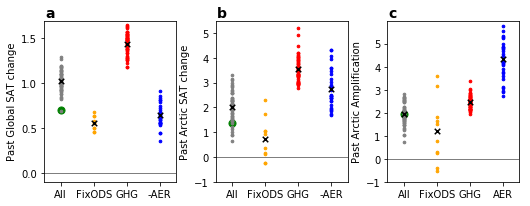

In [11]:
#### Plot trends
fig1, axs = plt.subplots(1,3, figsize=(8,8)); 
fig1.subplots_adjust(bottom=0.6,right=0.95,hspace=0.3,wspace=0.3)
##global
ax=axs[0]
rpl.add_title(ax,'','a')
ax.set_xlim([0.5, 4.5]) 
ax.set_xticks(np.arange(1,4+1))
ax.set_xticklabels(['All','FixODS','GHG','-AER'])

ax.set_ylim([-0.1, 1.7]) 
ax.set_yticks(np.arange(0,2,0.5))
ax.set_ylabel('Past Global SAT change')

ax.axhline(y=0,color="black",linewidth=0.5)

ax.scatter(np.ones(nens_his),dtas_his_gm.squeeze(),7,'gray')
ax.scatter(1,np.mean(dtas_his_gm),30,'black','x')
ax.scatter(1,0.7,50,'green',zorder=0)

ax.scatter(np.ones(nens_hisnocfc)*2,dtas_hisnocfc_gm.squeeze(),7,'orange')
ax.scatter(2,np.mean(dtas_hisnocfc_gm),30,'black','x')

ax.scatter(np.ones(nens_hisghg)*3,dtas_hisghg_gm.squeeze(),7,'red')
ax.scatter(3,np.mean(dtas_hisghg_gm),30,'black','x')

ax.scatter(np.ones(nens_hisaer)*4,-dtas_hisaer_gm.squeeze(),7,'blue')
ax.scatter(4,-np.mean(dtas_hisaer_gm),30,'black','x',)


##arc
ax=axs[1]
rpl.add_title(ax,'','b')
ax.set_xlim([0.5, 4.5]) 
ax.set_xticks(np.arange(1,4+1))
ax.set_xticklabels(['All','FixODS','GHG','-AER'])

ax.set_ylim([-1, 5.5]) 
ax.set_yticks(np.arange(-1,6,1))
ax.set_ylabel('Past Arctic SAT change')

ax.axhline(y=0,color="black",linewidth=0.5)

ax.scatter(np.ones(nens_his),dtas_his_arc.squeeze(),7,'gray')
ax.scatter(1,np.mean(dtas_his_arc),30,'black','x')
ax.scatter(1,1.35,50,'green',zorder=0)

ax.scatter(np.ones(nens_hisnocfc)*2,dtas_hisnocfc_arc.squeeze(),7,'orange')
ax.scatter(2,np.mean(dtas_hisnocfc_arc),30,'black','x')

ax.scatter(np.ones(nens_hisghg)*3,dtas_hisghg_arc.squeeze(),7,'red')
ax.scatter(3,np.mean(dtas_hisghg_arc),30,'black','x')

ax.scatter(np.ones(nens_hisaer)*4,-dtas_hisaer_arc.squeeze(),7,'blue')
ax.scatter(4,-np.mean(dtas_hisaer_arc),30,'black','x')


##AA
ax=axs[2]
rpl.add_title(ax,'','c')
ax.set_xlim([0.5, 4.5]) 
ax.set_xticks(np.arange(1,4+1))
ax.set_xticklabels(['All','FixODS','GHG','AER'])

ax.set_ylim([-1, 6]) 
ax.set_yticks(np.arange(-1,6,1))
ax.set_ylabel('Past Arctic Amplification')

ax.axhline(y=0,color="black",linewidth=0.5)

ax.scatter(np.ones(nens_his),(dtas_his_arc/dtas_his_gm).squeeze(),7,'gray')
ax.scatter(1,np.mean(dtas_his_arc/dtas_his_gm),30,'black','x')
ax.scatter(1,1.35/0.7,50,'green',zorder=0)

ax.scatter(np.ones(nens_hisnocfc)*2,(dtas_hisnocfc_arc/dtas_hisnocfc_gm).squeeze(),7,'orange')
ax.scatter(2,np.mean(dtas_hisnocfc_arc/dtas_hisnocfc_gm),30,'black','x')

ax.scatter(np.ones(nens_hisghg)*3,(dtas_hisghg_arc/dtas_hisghg_gm).squeeze(),7,'red')
ax.scatter(3,np.mean(dtas_hisghg_arc/dtas_hisghg_gm),30,'black','x')

ax.scatter(np.ones(nens_hisaer)*4,(dtas_hisaer_arc/dtas_hisaer_gm).squeeze(),7,'blue')
ax.scatter(4,np.mean(dtas_hisaer_arc/dtas_hisaer_gm),30,'black','x')


rpl.mysavefig(fig1,'fig1_tas_trends_historical_damip.png')



##Numbers
print 'Global'
print 'ALL: '+"%4.2f"%(np.mean(dtas_his_gm))
print 'FixODS: '+"%4.2f"%(np.mean(dtas_hisnocfc_gm))
print '% reduction due to fixing ODS: ' + "%4.2f"%((np.mean(dtas_his_gm)-np.mean(dtas_hisnocfc_gm))/np.mean(dtas_his_gm))
print ''
print 'GHG: '+"%4.2f"%(np.mean(dtas_hisghg_gm))
print 'AER: '+"%4.2f"%(np.mean(dtas_hisaer_gm))

print '------------------'
print 'Arctic'
print 'ALL: '+"%4.2f"%(np.mean(dtas_his_arc))
print 'FixODS: '+"%4.2f"%(np.mean(dtas_hisnocfc_arc))
print '% reduction due to fixing ODS: ' + "%4.2f"%((np.mean(dtas_his_arc)-np.mean(dtas_hisnocfc_arc))/np.mean(dtas_his_arc))
print ''
print 'GHG: '+"%4.2f"%(np.mean(dtas_hisghg_arc))
print 'AER: '+"%4.2f"%(np.mean(dtas_hisaer_arc))

print '------------------'
print 'Arctic Amplification'

print 'ALL: '+"%4.2f"%(np.mean(dtas_his_arc/dtas_his_gm))
print 'FixODS: '+"%4.2f"%(np.mean(dtas_hisnocfc_arc/dtas_hisnocfc_gm))
print ''
print 'GHG: '+"%4.2f"%(np.mean(dtas_hisghg_arc/dtas_hisghg_gm))
print 'AER: '+"%4.2f"%(np.mean(dtas_hisaer_arc/dtas_hisaer_gm))






__Comparison ALL(=historical) and FixODS runs to Polvani et al 2020 (https://doi.org/10.1038/s41558-019-0677-4)__

- Looking at the first column, the historical simulations, we can see that CanESM5 has a much higher climate sensitivity than CESM, and that it generally overestimates the 1955-2005 warming. For the global mean, only 1 out of the 25 ensemble members shows a warming comparable to observations, which is represented by the red dot (copied from Lorenzo's paper). 

- For the ensemble means, fixing ODSs (second column) reduces the global mean SAT change from 1.02°C to 0.55°C (a 45% decrease), and the Arctic mean SAT change from 2.04°C to 0.72°C (a 65% decrease). These (absolute but more importantly relative) numbers are even larger than for CESM (for fixed ODS+O3), which were for global mean SAT 0.59°C-->0.39°C (33% decrease), and for Arctic SAT 1.59°C -->0.82°C (48% decrease).

- GHGs (third column) are responsible for 1.45°C global and 3.69°C Arctic warming (again, for the ensemble means). Assuming linearity, ODSs are responsible for 1.02-0.55=0.47°C global mean and 2.04-0.72=1.32°C Arctic warming, which is  32% of the total GHG induced global mean warming, and 36% of the total GHG induced Arctic warming.

__Arctic Amplification__

- AA in the historical CanESM5 runs corresponds well with the observed AA. Both the ensemble mean and the observations, the Arctic is warming 2 times faster than the global mean. 

- I noticed that Fixing ODSs reduces this amplication factor, and I was wondering why.

- Which external forcings are driving observed AA? I'm not sure if there is a study looking at that.

- In GHG only simulations, AA is about 2.6, and hence larger than in the historical simulations with all forcings. How can this be understood? Why does AA reduce when you add aerosols?

- When you add aerosols, you add a cooling. This aerosol cooling is 4.3 times more effective in the Arctic compared to the global mean, which means that if you add aerosols to GHGs, amplication of Arctic warming reduces. 

- The implication is that particularly in scenarios with strongly declining future aerosols, AA increases, which declines SIE

- This may explain why difference in SIE trajectories between different scenarios is so small: While RF is lower in the lower emission scenarios, the aerosol declines are larger as well. And those reduced aerosol emissions lead to increased AA.

- Hypothesis: future SIE trajectories are relative insensitive to CMIP6 emission scenarios due to the strong impacts of aerosol reductions on the Arctic


#- Robustness of this result can be investigated with CanESM2 and/or CMIP6 models, but #note that 10+ ensemble members are needed to find robust results









    